## Lending Club dataset

### Converting data types, binarizing, one-hot encoding, features

In [1]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [2]:
df = pd.read_csv('./Data/LCdataset_cleaned80_254794.csv')
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash
2,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash
3,68476668,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,...,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash
4,67275481,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,road driver,...,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,N,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917467,89996426,32000.0,32000.0,32000.0,60 months,14.49,752.74,C,C4,Sales Manager,...,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0,N,Cash
917468,90006534,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,C1,Manager,...,92.0,50.0,3.0,0.0,87473.0,65797.0,10100.0,73473.0,N,Cash
917469,89955820,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,Current Operations Officer,...,100.0,0.0,0.0,2.0,128902.0,31320.0,93700.0,28602.0,N,Cash
917470,88977788,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,Database Administrator,...,75.9,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,Cash


In [3]:
df.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
Length: 106, dtype: int64

## Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917472 entries, 0 to 917471
Columns: 106 entries, id to disbursement_method
dtypes: float64(83), int64(1), object(22)
memory usage: 742.0+ MB


The above **df.info()** shows a number of columns that are still an object. Some of these elements would have to get binarized (i.e. application_type, empl_length), some would have to be converted to a numeric data type (i.e. int_rate and revol_util). 

From Data Dictionary: <br>
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. <br>
int_rate: Interest Rate on the loan

#### Convert to float: int_rate and revol_util

In [5]:
df['int_rate'] = df['int_rate'].apply(str).str.rstrip('%').astype('float')

In [6]:
df['revol_util'] = df['revol_util'].apply(str).str.rstrip('%').astype('float')

In [7]:
df['initial_list_status'].value_counts(dropna=False)

w    738552
f    178920
Name: initial_list_status, dtype: int64

#### Column: Application Type

In [8]:
df['application_type'].value_counts(dropna=False) 

Individual    841539
Joint App      75933
Name: application_type, dtype: int64

In [9]:
df['application_type'] = np.where(df['application_type'] == 'Individual', 1, 0)

In [10]:
df['application_type'].value_counts(dropna=False) 

1    841539
0     75933
Name: application_type, dtype: int64

#### Column: emp_length

In [11]:
df['emp_length'].value_counts(dropna=False) 

10+ years    328147
2 years       92209
3 years       81662
< 1 year      77971
1 year        66080
4 years       62343
5 years       61431
6 years       44249
7 years       35586
8 years       35058
9 years       32736
Name: emp_length, dtype: int64

In [12]:
def emp_length_classification(string):
    if "10+ years" in string:
        return 10
    elif "9 years" in string:
        return 9
    elif "8 years" in string:
        return 8
    elif "7 years" in string:
        return 7
    elif "6 years" in string:
        return 6
    elif "5 years" in string:
        return 5
    elif "4 years" in string:
        return 4
    elif "3 years" in string:
        return 3
    elif "2 years" in string:
        return 2
    elif "1 year" in string:
        return 1
    elif "< 1 year" in string:
        return 0

In [13]:
df['emp_length'] = df['emp_length'].map(emp_length_classification)

In [14]:
df['emp_length'].value_counts(dropna=False) 

10    328147
1     144051
2      92209
3      81662
4      62343
5      61431
6      44249
7      35586
8      35058
9      32736
Name: emp_length, dtype: int64

In [15]:
#test
def length(string):
    if '8 years' in string:
        return 8

In [16]:
length('Hello 8 years')

8

#### Column: term

In [17]:
df['term'].value_counts(dropna=False) 

 36 months    650932
 60 months    266540
Name: term, dtype: int64

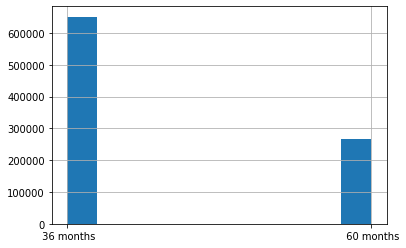

In [18]:
df['term'].hist();

#### More columns to convert: grade, subgrade

In [19]:
df['grade'].value_counts(dropna=False)

C    276385
B    268163
A    180681
D    127971
E     45515
F     13715
G      5042
Name: grade, dtype: int64

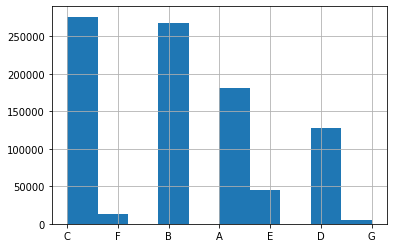

In [20]:
df['grade'].hist();

In [21]:
## Loan Amount by grade - grades C, B, and A are the most common
df.groupby(by='grade')['loan_amnt'].mean().sort_values(ascending=False)

grade
G    20604.338556
F    19547.690485
E    17261.109524
D    16093.646217
C    15471.105523
A    14917.138216
B    14542.823115
Name: loan_amnt, dtype: float64

In [22]:
df['sub_grade'].value_counts(dropna=False) #dropping to avoid multi collinearity

C1    62142
B5    61411
B4    55749
C4    53937
C3    53903
C5    53358
C2    53045
B1    51161
B2    50578
B3    49264
A5    41225
A4    39488
A1    38701
A3    31624
D1    30939
D2    29795
A2    29643
D3    26831
D4    21663
D5    18743
E1    10303
E5     9562
E3     8982
E2     8779
E4     7889
F1     4512
F2     2779
F3     2526
F4     1998
F5     1900
G1     1647
G2      976
G3      848
G4      803
G5      768
Name: sub_grade, dtype: int64

In [23]:
df.drop(columns='sub_grade', inplace=True)

#### Dropping non informative column

In [24]:
#dropping - this column is not informative
df.drop(columns= 'initial_list_status', axis=1, inplace=True)

In [25]:
df.shape

(917472, 104)

#### Column: home_ownership

In [26]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    466391
RENT        351191
OWN          99342
ANY            547
NONE             1
Name: home_ownership, dtype: int64

In [27]:
df[df['home_ownership'] == 'ANY']

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method
17667,130800405,5000.0,5000.0,5000.0,36 months,22.90,193.29,E,NotAsked,8,...,95.5,100.0,0.0,0.0,364187.0,150280.0,1000.0,145460.0,N,Cash
69800,126597329,10000.0,10000.0,10000.0,60 months,12.62,225.60,C,Registered Nurse,9,...,89.7,27.3,0.0,0.0,162104.0,79151.0,78800.0,73804.0,N,DirectPay
231309,140597991,8400.0,8400.0,8400.0,36 months,6.11,255.97,A,Principal,9,...,70.0,0.0,0.0,0.0,76100.0,55684.0,36300.0,35100.0,N,DirectPay
231382,141019540,5000.0,5000.0,5000.0,36 months,11.55,165.00,B,Registration Lead,1,...,89.5,100.0,0.0,0.0,66314.0,67842.0,2000.0,61914.0,N,Cash
231840,141052674,15000.0,15000.0,15000.0,60 months,8.46,307.46,A,Immigration Services Officer,4,...,100.0,25.0,0.0,0.0,68600.0,41521.0,30500.0,32000.0,N,DirectPay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862812,94191661,13800.0,13800.0,13800.0,36 months,16.99,491.94,D,"Supervisor, Assessment Services Office",10,...,100.0,100.0,0.0,0.0,116841.0,74059.0,31300.0,83941.0,N,Cash
862885,94536752,11200.0,11200.0,11200.0,60 months,18.99,290.48,D,Tech 2,10,...,100.0,100.0,0.0,0.0,89385.0,76554.0,12700.0,74285.0,N,Cash
863188,94606657,12000.0,12000.0,12000.0,60 months,7.99,243.26,A,Regional Manager,4,...,96.8,0.0,0.0,0.0,462848.0,84449.0,50500.0,113748.0,N,Cash
863199,94546600,16800.0,16800.0,16800.0,60 months,12.74,380.02,C,General Manager,3,...,88.9,40.0,0.0,0.0,444981.0,40860.0,11500.0,42881.0,N,Cash


In [28]:
df.drop(df[df['home_ownership'] == 'ANY'].index, inplace=True)

In [29]:
df.shape

(916925, 104)

In [30]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    466391
RENT        351191
OWN          99342
NONE             1
Name: home_ownership, dtype: int64

In [31]:
df['emp_title'].value_counts(dropna=False)

Teacher                          19051
Manager                          16824
Owner                            10864
Registered Nurse                  7977
Driver                            7957
                                 ...  
Sr. Project Sales Manager            1
1st class journeyman lineman         1
Executive office coordinator         1
Group operations manager             1
sergreant                            1
Name: emp_title, Length: 217758, dtype: int64

In [32]:
df['emp_title'].nunique() 

217758

In [33]:
df.drop(columns= 'emp_title', axis=1, inplace=True)

In [34]:
df.shape

(916925, 103)

In [35]:
df['purpose'].value_counts(dropna=False)

debt_consolidation    509433
credit_card           202645
home_improvement       67607
other                  62522
major_purchase         21850
medical                12263
car                     9665
small_business          9425
vacation                7247
house                   6857
moving                  6824
renewable_energy         582
wedding                    4
educational                1
Name: purpose, dtype: int64

In [36]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.555589
credit_card           0.221005
home_improvement      0.073732
other                 0.068187
major_purchase        0.023830
medical               0.013374
car                   0.010541
small_business        0.010279
vacation              0.007904
house                 0.007478
moving                0.007442
renewable_energy      0.000635
wedding               0.000004
educational           0.000001
Name: purpose, dtype: float64

In [37]:
def purpose_category(string):
    if "debt_consolidation" in string:
        return 'debt_consolidation'
    elif "credit_card" in string:
        return 'credit_card'
    elif "home_improvement" in string:
        return 'home_improvement'
    else:
        return 'other'
    
df['purpose'] = df['purpose'].map(purpose_category) 

In [38]:
df['purpose'].value_counts()

debt_consolidation    509433
credit_card           202645
other                 137240
home_improvement       67607
Name: purpose, dtype: int64

#### Column verification status

In [39]:
# verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified. 
# Using get dummies to binarize this column.
df['verification_status'].value_counts(dropna=False)

Source Verified    388277
Not Verified       320689
Verified           207959
Name: verification_status, dtype: int64

### One hot encoding with Pandas pd.get_dummies()

In [40]:
pd.get_dummies(df[['term', 'purpose', 'addr_state', 'grade', 'home_ownership','verification_status']], drop_first=True).head()

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_dummies = pd.get_dummies(df[['term', 'purpose', 'addr_state', 'grade', 'home_ownership', 'verification_status']], drop_first=True) 

In [42]:
# df = pd.concat([df,pd.get_dummies(df['purpose'], prefix='purpose', drop_first = True)],axis=1)
# df

In [43]:
df.shape

(916925, 103)

### Feature engineering a new column to calculate the age of the oldest credit line - columns issue_d and earliest_cr_line

The month which the loan was funded is not a factor in approving a loan application. However, this data field could be helpful in calculating the age of the earliest/oldest credit line - since both columns are dates. The issue_d is a close approximation of the time when an investor reviewed the loan application.

earliest_cr_line: The date the borrower's earliest reported credit line was opened

issue_d: The month which the loan was funded

In [44]:
#issue_d: The month which the loan was funded
df['issue_d'].value_counts(dropna=False)

Mar-2016    39400
May-2018    30780
Aug-2018    30080
Aug-2017    29596
Jul-2018    28990
Oct-2018    28751
Apr-2018    28741
Jun-2018    27928
Jul-2017    27085
Nov-2017    26853
Sep-2017    26434
Jun-2017    26270
Nov-2018    25996
May-2017    25980
Mar-2018    25371
Dec-2018    24994
Mar-2017    24895
Sep-2018    24773
Feb-2016    24729
Dec-2016    24469
Oct-2017    24461
Dec-2017    24314
Aug-2016    24045
Jan-2018    23655
Oct-2016    23431
Jul-2016    23233
Apr-2016    22834
Nov-2016    22718
Jun-2016    22072
Jan-2017    21581
Feb-2018    20983
Jan-2016    20506
Apr-2017    20097
Sep-2016    19108
Feb-2017    18719
May-2016    18121
Dec-2015    14932
Name: issue_d, dtype: int64

In [45]:
#earliest_cr_line: The date the borrower's earliest reported credit line was opened
df['earliest_cr_line'].value_counts(dropna=False)

Sep-2005    7722
Sep-2004    7532
Aug-2006    7441
Aug-2005    7358
Sep-2003    7024
            ... 
Nov-1960       1
Jul-1959       1
Jun-1949       1
Oct-1960       1
Mar-1933       1
Name: earliest_cr_line, Length: 694, dtype: int64

In [46]:
#Since both fields are objects/strings, they would have to be converted to datetime format, in order for me to calculate the age of the oldest credit line.
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])

In [47]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [48]:
df['age_oldest_line'] = df['issue_d'] - df['earliest_cr_line'] 

In [49]:
df['age_oldest_line'].value_counts()

4383 days     6102
4018 days     5181
5479 days     4522
4444 days     4357
4748 days     4259
              ... 
17592 days       1
19967 days       1
20179 days       1
21549 days       1
17808 days       1
Name: age_oldest_line, Length: 2547, dtype: int64

In [50]:
#changing the format to numeric (to remove the word 'days' appearing in the column)
df['age_oldest_line'] = df['age_oldest_line'].dt.days

In [51]:
4748/365

13.008219178082191

In [52]:
#updating the age of oldest line columns from days to years (365 days )
df['age_oldest_line'] = round(df['age_oldest_line']/365)

In [53]:
df['age_oldest_line'].value_counts()

12.0    72331
13.0    71025
11.0    64744
14.0    64514
15.0    57548
        ...  
68.0        2
62.0        1
65.0        1
71.0        1
66.0        1
Name: age_oldest_line, Length: 68, dtype: int64

In [54]:
#drop the other two columns
df.drop(columns = ['earliest_cr_line', 'issue_d'], axis=1, inplace=True)
df.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,age_oldest_line
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,12.0
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,16.0
2,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,18.0


In [55]:
df.shape

(916925, 102)

In [56]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'age_oldest_line'],
      dtype='object', length=102)

In [57]:
df['addr_state'].nunique()

50

In [58]:
df['addr_state'].value_counts(dropna=False) #50 states

CA    118866
TX     79025
NY     68781
FL     65727
IL     39005
NJ     34198
OH     32648
PA     32324
GA     29701
MI     25283
VA     24278
NC     24215
AZ     22483
MD     22099
MA     21576
WA     18182
IN     17215
CO     16819
MN     16680
CT     15553
MO     15344
TN     15133
WI     13206
NV     12963
SC     11151
AL     10958
OR     10178
LA     10039
KY      9348
OK      8778
KS      7895
AR      7095
MS      5927
UT      5903
NH      5126
NE      4728
NM      4590
RI      4283
HI      3851
ME      3207
DE      2747
ID      2701
WV      2618
MT      2475
VT      2279
ND      2107
AK      2010
SD      1930
WY      1863
DC      1834
Name: addr_state, dtype: int64

In [59]:
# Checking the max number of columns supported by this number of rows
import math

math.sqrt(254794)

504.77123531358245

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,916925.0,1.104454e+08,2.384983e+07,56121.00,90292253.00,1.135260e+08,1.317265e+08,1.456473e+08
loan_amnt,916925.0,1.535604e+04,9.612225e+03,1000.00,8000.00,1.300000e+04,2.000000e+04,4.000000e+04
funded_amnt,916925.0,1.535602e+04,9.612226e+03,1000.00,8000.00,1.300000e+04,2.000000e+04,4.000000e+04
funded_amnt_inv,916925.0,1.535151e+04,9.610616e+03,725.00,8000.00,1.300000e+04,2.000000e+04,4.000000e+04
int_rate,916925.0,1.316194e+01,5.132010e+00,5.31,9.44,1.262000e+01,1.599000e+01,3.099000e+01
...,...,...,...,...,...,...,...,...
tot_hi_cred_lim,916925.0,1.967560e+05,1.868536e+05,1100.00,61131.00,1.349260e+05,2.827310e+05,9.999999e+06
total_bal_ex_mort,916925.0,5.866697e+04,5.341186e+04,1.00,26110.00,4.380800e+04,7.315900e+04,3.408095e+06
total_bc_limit,916925.0,2.471180e+04,2.385423e+04,100.00,9100.00,1.760000e+04,3.230000e+04,1.105500e+06
total_il_high_credit_limit,916925.0,5.353726e+04,4.756618e+04,87.00,22894.00,4.057000e+04,6.919300e+04,1.736064e+06


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916925 entries, 0 to 917471
Columns: 102 entries, id to age_oldest_line
dtypes: float64(84), int32(1), int64(2), object(15)
memory usage: 717.0+ MB


### Defining the Target variable for modeling

The target variable is based on the Loan Status variable. 

Good loans = Current + Fully Paid + In Grace Period + Issues
Bad loans = Charged off + Default + Late (16-30 days) + Late (31-120 days)

Good loans/Current status = 1
Bad loans/Defaulting and Lates = 0

In [62]:
#Huge class imbalance
df['loan_status'].value_counts(dropna=False)

Current               534505
Fully Paid            284046
Charged Off            77909
Late (31-120 days)     12846
In Grace Period         5108
Late (16-30 days)       2488
Default                   23
Name: loan_status, dtype: int64

In [63]:
#Huge class imbalance
df['loan_status'].value_counts(normalize=True)

Current               0.582932
Fully Paid            0.309781
Charged Off           0.084968
Late (31-120 days)    0.014010
In Grace Period       0.005571
Late (16-30 days)     0.002713
Default               0.000025
Name: loan_status, dtype: float64

In [64]:
2006 + 1951 + 397 + 22

4376

In [65]:
# will create a new columns df['loan_status_lr']

def loan_status_classification(string):
    if "Current" in string:
        return 1 
    elif "Fully Paid" in string:
        return 1
    elif "Late" in string:
        return 0
    elif "Charged Off" in string:
        return 0
    elif "In Grace Period" in string:
        return 1
    elif "Issued" in string:
        return 1
    elif "Default" in string:
        return 0
    
df['loan_status_log'] = df['loan_status'].map(loan_status_classification)    

In [66]:
df.shape

(916925, 103)

In [67]:
df['loan_status_log'].value_counts() #these values match 1 vs 0 I've calculated

1    823659
0     93266
Name: loan_status_log, dtype: int64

In [68]:
df['loan_status_log'].value_counts(normalize=True)  #class imbalance

1    0.898284
0    0.101716
Name: loan_status_log, dtype: float64

In [69]:
df.shape

(916925, 103)

<AxesSubplot:>

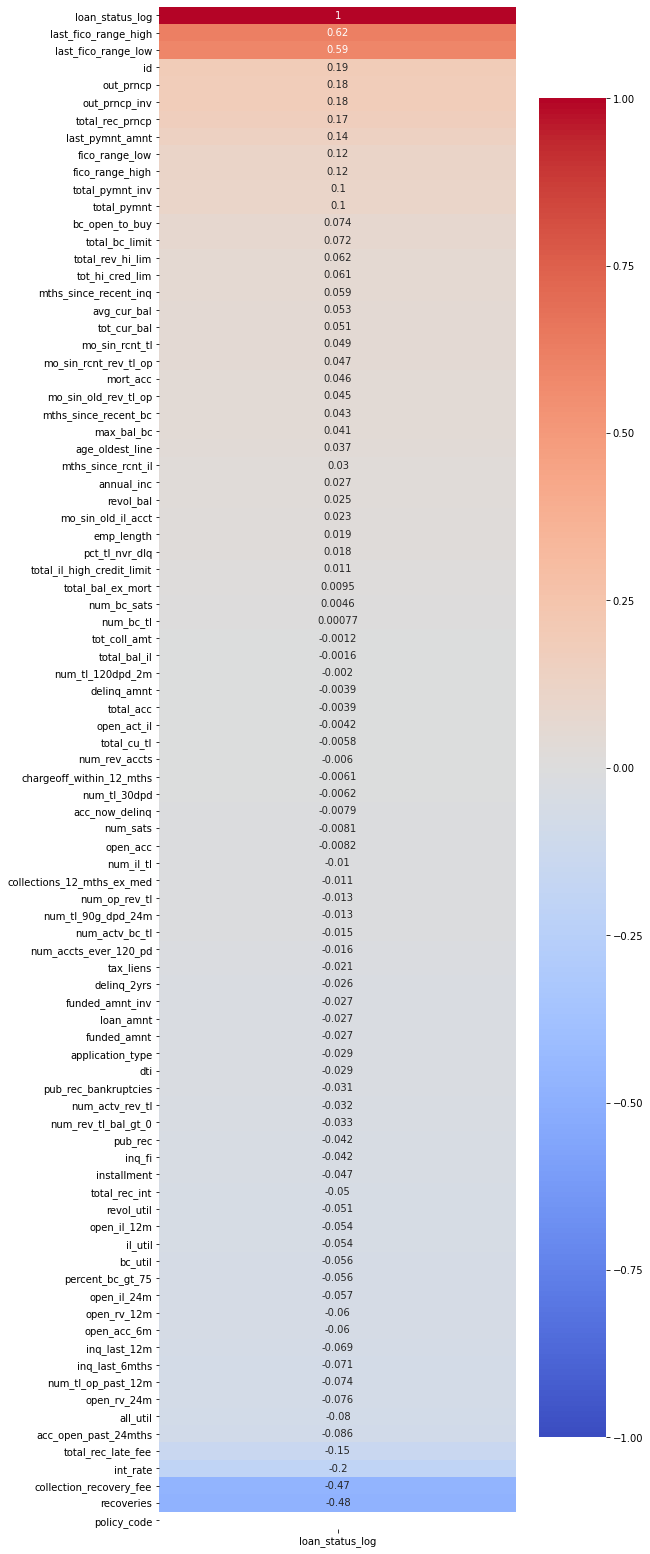

In [70]:
plt.figure(figsize=(8,28))

sns.heatmap(df.corr()[['loan_status_log']].sort_values('loan_status_log', ascending=False), 
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

In [71]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,age_oldest_line,loan_status_log
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10,MORTGAGE,...,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,12.0,1
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10,MORTGAGE,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,16.0,1
2,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3,MORTGAGE,...,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,18.0,1
3,68476668,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10,MORTGAGE,...,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,26.0,1
4,67275481,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10,MORTGAGE,...,0.0,0.0,193390.0,27937.0,14500.0,36144.0,N,Cash,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917467,89996426,32000.0,32000.0,32000.0,60 months,14.49,752.74,C,3,MORTGAGE,...,0.0,0.0,524379.0,122872.0,15800.0,23879.0,N,Cash,5.0,0
917468,90006534,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,10,RENT,...,3.0,0.0,87473.0,65797.0,10100.0,73473.0,N,Cash,19.0,1
917469,89955820,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,4,OWN,...,0.0,2.0,128902.0,31320.0,93700.0,28602.0,N,Cash,16.0,1
917470,88977788,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,10,MORTGAGE,...,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,Cash,26.0,1


In [72]:
df_dummies

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917467,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
917468,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
917469,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
917470,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression

#### Set X and y variables

In [73]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,age_oldest_line,loan_status_log
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10,MORTGAGE,...,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,12.0,1
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10,MORTGAGE,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,16.0,1
2,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3,MORTGAGE,...,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,18.0,1
3,68476668,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10,MORTGAGE,...,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,26.0,1
4,67275481,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10,MORTGAGE,...,0.0,0.0,193390.0,27937.0,14500.0,36144.0,N,Cash,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917467,89996426,32000.0,32000.0,32000.0,60 months,14.49,752.74,C,3,MORTGAGE,...,0.0,0.0,524379.0,122872.0,15800.0,23879.0,N,Cash,5.0,0
917468,90006534,16000.0,16000.0,16000.0,60 months,12.79,362.34,C,10,RENT,...,3.0,0.0,87473.0,65797.0,10100.0,73473.0,N,Cash,19.0,1
917469,89955820,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,4,OWN,...,0.0,2.0,128902.0,31320.0,93700.0,28602.0,N,Cash,16.0,1
917470,88977788,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,10,MORTGAGE,...,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,Cash,26.0,1


In [74]:
## Define X and y
X = df.drop(columns = ['pymnt_plan','title','url','zip_code','last_credit_pull_d','last_pymnt_d','hardship_flag','disbursement_method','loan_status', 'loan_status_log', 'term', 'purpose', 'addr_state', 'grade', 'home_ownership', 'verification_status', 'application_type'], axis=1)
y = df[['loan_status_log']]

In [75]:
X.shape

(916925, 86)

In [76]:
#X = X.drop([X.index[916924], df.index[916923]])

In [77]:
X

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,68407277,3600.0,3600.0,3600.0,13.99,123.03,10,55000.0,5.91,0.0,...,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,12.0
1,68355089,24700.0,24700.0,24700.0,11.99,820.28,10,65000.0,16.06,1.0,...,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,16.0
2,68476807,10400.0,10400.0,10400.0,22.45,289.91,3,104433.0,25.37,1.0,...,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,18.0
3,68476668,20000.0,20000.0,20000.0,9.17,637.58,10,180000.0,14.67,0.0,...,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,26.0
4,67275481,20000.0,20000.0,20000.0,8.49,631.26,10,85000.0,17.61,1.0,...,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917467,89996426,32000.0,32000.0,32000.0,14.49,752.74,3,157000.0,10.34,0.0,...,2.0,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0,5.0
917468,90006534,16000.0,16000.0,16000.0,12.79,362.34,10,150000.0,12.25,0.0,...,2.0,92.0,50.0,3.0,0.0,87473.0,65797.0,10100.0,73473.0,19.0
917469,89955820,24000.0,24000.0,24000.0,10.49,515.74,4,125000.0,10.98,0.0,...,5.0,100.0,0.0,0.0,2.0,128902.0,31320.0,93700.0,28602.0,16.0
917470,88977788,24000.0,24000.0,24000.0,10.49,515.74,10,108000.0,34.94,0.0,...,0.0,75.9,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,26.0


In [78]:
X.shape

(916925, 86)

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916925 entries, 0 to 917471
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          916925 non-null  int64  
 1   loan_amnt                   916925 non-null  float64
 2   funded_amnt                 916925 non-null  float64
 3   funded_amnt_inv             916925 non-null  float64
 4   int_rate                    916925 non-null  float64
 5   installment                 916925 non-null  float64
 6   emp_length                  916925 non-null  int64  
 7   annual_inc                  916925 non-null  float64
 8   dti                         916925 non-null  float64
 9   delinq_2yrs                 916925 non-null  float64
 10  fico_range_low              916925 non-null  float64
 11  fico_range_high             916925 non-null  float64
 12  inq_last_6mths              916925 non-null  float64
 13  open_acc      

In [80]:
#y.drop(y.index[[21141, 227679]], inplace=True)

In [81]:
y.shape

(916925, 1)

#### Scale numeric data with StandardScaler

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [84]:
X_sc

array([[-1.76261834e+00, -1.22303080e+00, -1.22302855e+00, ...,
        -9.35339625e-01, -8.36797804e-01, -5.46124407e-01],
       [-1.76480653e+00,  9.72091806e-01,  9.72093683e-01, ...,
         2.28840879e+00, -6.06949512e-01,  9.09510819e-04],
       [-1.75970301e+00, -5.15597922e-01, -5.15595792e-01, ...,
        -1.84948251e-01,  7.26561621e-01,  2.74426470e-01],
       ...,
       [-8.59108512e-01,  8.99267833e-01,  8.99269723e-01, ...,
         2.89207559e+00, -5.24222627e-01,  9.09510819e-04],
       [-9.00116459e-01,  8.99267833e-01,  8.99269723e-01, ...,
         1.33653673e-01,  2.49643342e+00,  1.36849431e+00],
       [-9.31703579e-01,  8.99267833e-01,  8.99269723e-01, ...,
        -1.68179729e-01,  1.09883676e-01,  1.37667990e-01]])

In [85]:
pd.DataFrame(X_sc)

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,-1.762618,-1.223031,-1.223029,-1.222765,0.161352,-1.184990,1.114394,-0.339022,-1.116500,-0.349454,...,0.355059,-1.862912,-1.039880,-0.370777,-0.126193,-0.100110,-0.953365,-0.935340,-0.836798,-0.546124
1,-1.764807,0.972092,0.972094,0.972726,-0.228359,1.303649,1.114394,-0.221641,-0.319651,0.788638,...,-0.166328,0.367985,-0.822970,-0.370777,-0.126193,0.627556,-0.359321,2.288409,-0.606950,0.000910
2,-1.759703,-0.515598,-0.515596,-0.515213,1.809830,-0.589358,-0.833910,0.241225,0.411252,0.788638,...,0.876445,0.280926,0.650323,-0.370777,-0.126193,1.299489,0.694622,-0.184948,0.726562,0.274426
3,-1.759709,0.483131,0.483133,0.483683,-0.777852,0.651553,1.114394,1.128233,-0.428776,-0.349454,...,-0.166328,0.248279,1.777124,-0.370777,-0.126193,1.028057,1.087681,0.284570,-0.148956,1.368494
4,-1.810073,0.483131,0.483133,0.483683,-0.910354,0.628995,1.114394,0.013119,-0.197965,0.788638,...,-1.209101,-0.078194,-1.039880,-0.370777,-0.126193,-0.018014,-0.575340,-0.428092,-0.365665,0.137668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916920,-0.857406,1.731542,1.731544,1.732303,0.258780,1.062584,-0.833910,0.858258,-0.768713,-0.349454,...,-0.166328,0.650928,-1.039880,-0.370777,-0.126193,1.753368,1.202075,-0.373594,-0.623516,-1.503434
916921,-0.856982,0.066994,0.066996,0.067476,-0.072475,-0.330840,1.114394,0.776092,-0.618764,-0.349454,...,-0.166328,-0.219666,0.368622,7.579190,-0.126193,-0.584859,0.133492,-0.612546,0.419116,0.411185
916922,-0.859109,0.899268,0.899270,0.899889,-0.520643,0.216679,-0.555581,0.482641,-0.718468,-0.349454,...,1.397832,0.650928,-1.039880,-0.370777,5.157697,-0.363140,-0.512002,2.892076,-0.524223,0.000910
916923,-0.900116,0.899268,0.899270,0.899889,-0.520643,0.216679,1.114394,0.283094,1.162567,-0.349454,...,-1.209101,-1.971736,0.168615,-0.370777,2.515752,0.166585,1.524962,0.133654,2.496433,1.368494


In [86]:
pd.DataFrame(X_sc, columns=X.columns) #turning X_sc into a dataframe

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,-1.762618,-1.223031,-1.223029,-1.222765,0.161352,-1.184990,1.114394,-0.339022,-1.116500,-0.349454,...,0.355059,-1.862912,-1.039880,-0.370777,-0.126193,-0.100110,-0.953365,-0.935340,-0.836798,-0.546124
1,-1.764807,0.972092,0.972094,0.972726,-0.228359,1.303649,1.114394,-0.221641,-0.319651,0.788638,...,-0.166328,0.367985,-0.822970,-0.370777,-0.126193,0.627556,-0.359321,2.288409,-0.606950,0.000910
2,-1.759703,-0.515598,-0.515596,-0.515213,1.809830,-0.589358,-0.833910,0.241225,0.411252,0.788638,...,0.876445,0.280926,0.650323,-0.370777,-0.126193,1.299489,0.694622,-0.184948,0.726562,0.274426
3,-1.759709,0.483131,0.483133,0.483683,-0.777852,0.651553,1.114394,1.128233,-0.428776,-0.349454,...,-0.166328,0.248279,1.777124,-0.370777,-0.126193,1.028057,1.087681,0.284570,-0.148956,1.368494
4,-1.810073,0.483131,0.483133,0.483683,-0.910354,0.628995,1.114394,0.013119,-0.197965,0.788638,...,-1.209101,-0.078194,-1.039880,-0.370777,-0.126193,-0.018014,-0.575340,-0.428092,-0.365665,0.137668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916920,-0.857406,1.731542,1.731544,1.732303,0.258780,1.062584,-0.833910,0.858258,-0.768713,-0.349454,...,-0.166328,0.650928,-1.039880,-0.370777,-0.126193,1.753368,1.202075,-0.373594,-0.623516,-1.503434
916921,-0.856982,0.066994,0.066996,0.067476,-0.072475,-0.330840,1.114394,0.776092,-0.618764,-0.349454,...,-0.166328,-0.219666,0.368622,7.579190,-0.126193,-0.584859,0.133492,-0.612546,0.419116,0.411185
916922,-0.859109,0.899268,0.899270,0.899889,-0.520643,0.216679,-0.555581,0.482641,-0.718468,-0.349454,...,1.397832,0.650928,-1.039880,-0.370777,5.157697,-0.363140,-0.512002,2.892076,-0.524223,0.000910
916923,-0.900116,0.899268,0.899270,0.899889,-0.520643,0.216679,1.114394,0.283094,1.162567,-0.349454,...,-1.209101,-1.971736,0.168615,-0.370777,2.515752,0.166585,1.524962,0.133654,2.496433,1.368494


In [87]:
df_dummies

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917467,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
917468,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
917469,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
917470,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_sc = pd.DataFrame(X_sc, columns=X.columns)  #gave it a name

In [89]:
df_sc.isna().sum().sum()

0

In [90]:
df_dummies.isna().sum().sum()

0

In [91]:
pd.concat([df_dummies, df_sc], axis=1).dropna().isna().sum().sum()

0

#### Create a finalized dataframe of scaled numeric and binarized variables

In [92]:
df_final = pd.concat([df_dummies, df_sc], axis=1, join='inner')

In [93]:
df_final

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,0,1,0,0,0,0,0,0,0,0,...,0.355059,-1.862912,-1.039880,-0.370777,-0.126193,-0.100110,-0.953365,-0.935340,-0.836798,-0.546124
1,0,0,0,1,0,0,0,0,0,0,...,-0.166328,0.367985,-0.822970,-0.370777,-0.126193,0.627556,-0.359321,2.288409,-0.606950,0.000910
2,1,0,0,1,0,0,0,0,0,0,...,0.876445,0.280926,0.650323,-0.370777,-0.126193,1.299489,0.694622,-0.184948,0.726562,0.274426
3,0,1,0,0,0,0,0,0,0,0,...,-0.166328,0.248279,1.777124,-0.370777,-0.126193,1.028057,1.087681,0.284570,-0.148956,1.368494
4,0,0,0,1,0,0,0,0,0,0,...,-1.209101,-0.078194,-1.039880,-0.370777,-0.126193,-0.018014,-0.575340,-0.428092,-0.365665,0.137668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916920,0,0,0,0,0,0,0,1,0,0,...,-0.166328,0.650928,-1.039880,-0.370777,-0.126193,1.753368,1.202075,-0.373594,-0.623516,-1.503434
916921,0,1,0,0,0,1,0,0,0,0,...,-0.166328,-0.219666,0.368622,7.579190,-0.126193,-0.584859,0.133492,-0.612546,0.419116,0.411185
916922,1,1,0,0,0,0,0,1,0,0,...,1.397832,0.650928,-1.039880,-0.370777,5.157697,-0.363140,-0.512002,2.892076,-0.524223,0.000910
916923,0,1,0,0,0,0,0,0,0,0,...,-1.209101,-1.971736,0.168615,-0.370777,2.515752,0.166585,1.524962,0.133654,2.496433,1.368494


In [106]:
df_final

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,0,1,0,0,0,0,0,0,0,0,...,0.355059,-1.862912,-1.039880,-0.370777,-0.126193,-0.100110,-0.953365,-0.935340,-0.836798,-0.546124
1,0,0,0,1,0,0,0,0,0,0,...,-0.166328,0.367985,-0.822970,-0.370777,-0.126193,0.627556,-0.359321,2.288409,-0.606950,0.000910
2,1,0,0,1,0,0,0,0,0,0,...,0.876445,0.280926,0.650323,-0.370777,-0.126193,1.299489,0.694622,-0.184948,0.726562,0.274426
3,0,1,0,0,0,0,0,0,0,0,...,-0.166328,0.248279,1.777124,-0.370777,-0.126193,1.028057,1.087681,0.284570,-0.148956,1.368494
4,0,0,0,1,0,0,0,0,0,0,...,-1.209101,-0.078194,-1.039880,-0.370777,-0.126193,-0.018014,-0.575340,-0.428092,-0.365665,0.137668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916920,0,0,0,0,0,0,0,1,0,0,...,-0.166328,0.650928,-1.039880,-0.370777,-0.126193,1.753368,1.202075,-0.373594,-0.623516,-1.503434
916921,0,1,0,0,0,1,0,0,0,0,...,-0.166328,-0.219666,0.368622,7.579190,-0.126193,-0.584859,0.133492,-0.612546,0.419116,0.411185
916922,1,1,0,0,0,0,0,1,0,0,...,1.397832,0.650928,-1.039880,-0.370777,5.157697,-0.363140,-0.512002,2.892076,-0.524223,0.000910
916923,0,1,0,0,0,0,0,0,0,0,...,-1.209101,-1.971736,0.168615,-0.370777,2.515752,0.166585,1.524962,0.133654,2.496433,1.368494


In [109]:
y.drop(y.tail(547).index, inplace= True)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [110]:
y.shape

(916378, 1)

In [111]:
df_final[df_final['addr_state_AL'].isnull()]  #dummies side

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line


In [112]:
df_final[df_final['tax_liens'].isnull()] #numeric side

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line


In [113]:
df_final.isna().sum().sum()

0

In [114]:
df_final

,term_ 60 months,purpose_debt_consolidation,purpose_home_improvement,purpose_other,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,age_oldest_line
0,0,1,0,0,0,0,0,0,0,0,...,0.355059,-1.862912,-1.039880,-0.370777,-0.126193,-0.100110,-0.953365,-0.935340,-0.836798,-0.546124
1,0,0,0,1,0,0,0,0,0,0,...,-0.166328,0.367985,-0.822970,-0.370777,-0.126193,0.627556,-0.359321,2.288409,-0.606950,0.000910
2,1,0,0,1,0,0,0,0,0,0,...,0.876445,0.280926,0.650323,-0.370777,-0.126193,1.299489,0.694622,-0.184948,0.726562,0.274426
3,0,1,0,0,0,0,0,0,0,0,...,-0.166328,0.248279,1.777124,-0.370777,-0.126193,1.028057,1.087681,0.284570,-0.148956,1.368494
4,0,0,0,1,0,0,0,0,0,0,...,-1.209101,-0.078194,-1.039880,-0.370777,-0.126193,-0.018014,-0.575340,-0.428092,-0.365665,0.137668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916920,0,0,0,0,0,0,0,1,0,0,...,-0.166328,0.650928,-1.039880,-0.370777,-0.126193,1.753368,1.202075,-0.373594,-0.623516,-1.503434
916921,0,1,0,0,0,1,0,0,0,0,...,-0.166328,-0.219666,0.368622,7.579190,-0.126193,-0.584859,0.133492,-0.612546,0.419116,0.411185
916922,1,1,0,0,0,0,0,1,0,0,...,1.397832,0.650928,-1.039880,-0.370777,5.157697,-0.363140,-0.512002,2.892076,-0.524223,0.000910
916923,0,1,0,0,0,0,0,0,0,0,...,-1.209101,-1.971736,0.168615,-0.370777,2.515752,0.166585,1.524962,0.133654,2.496433,1.368494


#### Train_test_split

In [115]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.4, random_state=42)

In [116]:
X_train.shape

(549826, 150)

In [117]:
y_train.shape

(549826, 1)

#### Modeling

In [118]:
#Instantiate
logreg = LogisticRegression(solver = 'liblinear', max_iter=2000) #liblinear solver - ran with no errors

#Fit
logreg.fit(X_train, y_train.values.ravel()) #yay!!

#Print coef
print(f'Logistic Regression Coefficient: {logreg.coef_}')
print(f'Logistic Regression Intercept: {logreg.intercept_}')

Logistic Regression Coefficient: [[ 2.47560902e-02 -6.38819197e-02 -1.08558472e-01 -5.89822755e-02
  -2.26652341e-01 -2.58305287e-01 -6.08606428e-02 -8.53690007e-02
   1.25516523e-01  2.32144797e-01  1.92130550e-01  2.67459115e-02
  -1.49217590e-01  7.61039916e-02  1.19858030e-01 -1.32018506e-02
   1.69119953e-01 -8.93374294e-02  2.12622358e-01 -1.34058607e-01
  -1.64768488e-01 -7.87454085e-02 -1.66186380e-01  6.50877419e-01
  -6.70186404e-02 -7.33502801e-02 -1.28700365e-01 -3.02129624e-01
   1.95184539e-01 -1.08238850e-01  1.93416396e-01 -1.31611445e-01
   2.66278095e-01 -5.70605938e-02 -9.95073948e-02 -1.95124091e-01
  -1.47321086e-01  4.27215242e-02 -2.25427920e-01  3.64114676e-01
  -8.47061768e-02  9.45499164e-02  2.87053502e-01  2.67241702e-02
  -1.75306029e-02 -1.22454006e-01  8.11114467e-02 -8.70573171e-03
   4.42590109e-01  2.69869088e-01 -4.56158949e-02  4.26213401e-01
   1.10224947e-01 -8.75983390e-01 -1.43683712e+00 -1.86513833e+00
  -2.19110055e+00 -2.54773396e+00 -2.818742

In [119]:
#Instantiate
logreg_lb = LogisticRegression(solver = 'lbfgs', max_iter=2000)  #lbfgs solver

#Fit
logreg_lb.fit(X_train, y_train.values.ravel())

#Print coef
print(f'Logistic Regression Coefficient: {logreg_lb.coef_}')
print(f'Logistic Regression Intercept: {logreg_lb.intercept_}')

Logistic Regression Coefficient: [[ 2.47915746e-02 -6.40555869e-02 -1.08759427e-01 -5.89370616e-02
  -1.89338328e-01 -2.23751294e-01 -2.49780658e-02 -4.95784122e-02
   1.61811414e-01  2.65949530e-01  2.30563531e-01  6.38636614e-02
  -1.13751652e-01  1.12156529e-01  1.60996949e-01  2.41729314e-02
   2.05221508e-01 -5.37242114e-02  2.48385245e-01 -9.83465883e-02
  -1.28707377e-01 -4.33545745e-02 -1.30102029e-01  6.82030802e-01
  -3.13363290e-02 -3.76663755e-02 -9.27716240e-02 -2.66413403e-01
   2.28721734e-01 -7.23750257e-02  2.26844165e-01 -9.60635454e-02
   3.08465803e-01 -2.17079418e-02 -6.33579396e-02 -1.58802399e-01
  -1.11491519e-01  7.82866211e-02 -1.90113012e-01  4.02971404e-01
  -4.91012827e-02  1.35058758e-01  3.25404937e-01  6.12671032e-02
   1.86390980e-02 -8.64869198e-02  1.16342108e-01  2.72832738e-02
   4.84098900e-01  3.06067116e-01 -9.88906944e-03  4.72322770e-01
   1.45655829e-01 -8.77504532e-01 -1.43855621e+00 -1.86669088e+00
  -2.19273659e+00 -2.54988309e+00 -2.819170

In [120]:
np.exp(logreg.coef_)

array([[1.02506507, 0.93811577, 0.89712644, 0.94272348, 0.79719789,
        0.77235941, 0.94095436, 0.91817342, 1.1337339 , 1.26130235,
        1.21182871, 1.02710679, 0.86138167, 1.07907478, 1.12733679,
        0.98688491, 1.18426219, 0.91453693, 1.23691745, 0.87453881,
        0.84809002, 0.92427521, 0.84688838, 1.9172223 , 0.93517777,
        0.92927527, 0.87923738, 0.73924223, 1.21553528, 0.89741322,
        1.21338794, 0.87668157, 1.30509795, 0.94453683, 0.90528326,
        0.82273256, 0.86301683, 1.04364722, 0.79817459, 1.43923925,
        0.9187822 , 1.09916403, 1.3324955 , 1.02708446, 0.98262216,
        0.8847466 , 1.08449175, 0.99133205, 1.55673411, 1.30979297,
        0.95540887, 1.53144755, 1.1165292 , 0.41645228, 0.23767832,
        0.15487479, 0.11179365, 0.0782588 , 0.05968097, 1.141284  ,
        0.85298433, 0.76296735, 0.82357912, 0.75853219, 1.70454811,
        0.9217826 , 0.92179021, 1.04484646, 1.04167406, 1.0645279 ,
        1.00017675, 1.00174733, 0.98870497, 0.98

In [121]:
np.exp(logreg.coef_)[0]

array([1.02506507, 0.93811577, 0.89712644, 0.94272348, 0.79719789,
       0.77235941, 0.94095436, 0.91817342, 1.1337339 , 1.26130235,
       1.21182871, 1.02710679, 0.86138167, 1.07907478, 1.12733679,
       0.98688491, 1.18426219, 0.91453693, 1.23691745, 0.87453881,
       0.84809002, 0.92427521, 0.84688838, 1.9172223 , 0.93517777,
       0.92927527, 0.87923738, 0.73924223, 1.21553528, 0.89741322,
       1.21338794, 0.87668157, 1.30509795, 0.94453683, 0.90528326,
       0.82273256, 0.86301683, 1.04364722, 0.79817459, 1.43923925,
       0.9187822 , 1.09916403, 1.3324955 , 1.02708446, 0.98262216,
       0.8847466 , 1.08449175, 0.99133205, 1.55673411, 1.30979297,
       0.95540887, 1.53144755, 1.1165292 , 0.41645228, 0.23767832,
       0.15487479, 0.11179365, 0.0782588 , 0.05968097, 1.141284  ,
       0.85298433, 0.76296735, 0.82357912, 0.75853219, 1.70454811,
       0.9217826 , 0.92179021, 1.04484646, 1.04167406, 1.0645279 ,
       1.00017675, 1.00174733, 0.98870497, 0.98805077, 0.98395

In [122]:
np.exp(logreg.coef_)[0][0]

1.025065066624819

#### Model evaluation

In [123]:
# Evaluate model.
print(f'Logistic Regression Accuracy Score: {logreg.score(X_test, y_test)}')


Logistic Regression Accuracy Score: 0.8988847421375412


In [124]:
# Evaluate model.
print(f'Logistic Regression Accuracy Score: {logreg_lb.score(X_test, y_test)}') #lb solver

Logistic Regression Accuracy Score: 0.8988820140116546


In [125]:
#Predicting the values - testing set

logreg.predict_proba(X_test)

array([[0.09823828, 0.90176172],
       [0.00966984, 0.99033016],
       [0.06454764, 0.93545236],
       ...,
       [0.02225818, 0.97774182],
       [0.03549347, 0.96450653],
       [0.04756929, 0.95243071]])

In [126]:
from sklearn.metrics import plot_confusion_matrix

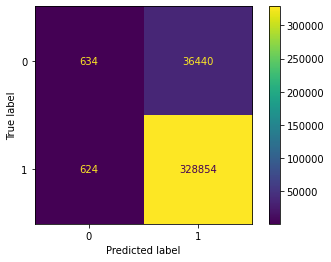

In [127]:
plot_confusion_matrix(logreg, X_test, y_test, values_format='.0f'); 

In [130]:
X_train.columns

Index(['term_ 60 months', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_other', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT',
       ...
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'age_oldest_line'],
      dtype='object', length=150)

In [131]:
coef = []
columns = []
for x,y  in zip(np.exp(logreg.coef_)[0], X_train.columns.values):
    coef.append(x)
    columns.append(y)
    

In [132]:
pd.DataFrame({'coef': coef, 'features': columns})

,coef,features
0,1.025065,term_ 60 months
1,0.938116,purpose_debt_consolidation
2,0.897126,purpose_home_improvement
3,0.942723,purpose_other
4,0.797198,addr_state_AL
...,...,...
145,1.007465,tot_hi_cred_lim
146,0.936061,total_bal_ex_mort
147,1.005899,total_bc_limit
148,1.035308,total_il_high_credit_limit


In [133]:
df_features = pd.DataFrame({'coef': coef, 'features': columns})

In [134]:
top20 = df_features.sort_values(by='coef', ascending=False).head(20)
top20

,coef,features
23,1.917222,addr_state_ME
64,1.704548,id
48,1.556734,addr_state_VT
51,1.531448,addr_state_WV
39,1.439239,addr_state_OR
42,1.332496,addr_state_SC
49,1.309793,addr_state_WA
32,1.305098,addr_state_NH
9,1.261302,addr_state_CT
86,1.250331,total_rec_prncp


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

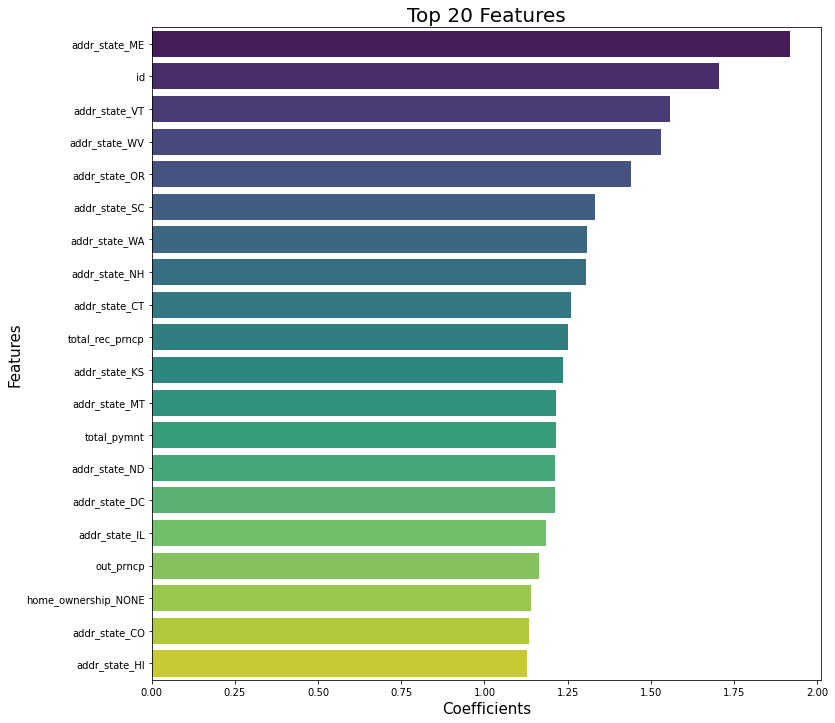

In [136]:
plt.figure(figsize=(12, 12))

sns.barplot(data=top20, x='coef', y='features', palette='viridis');

plt.xlabel('Coefficients', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Top 20 Features', fontsize=20)

plt.savefig('Top20Features_wStates')

<AxesSubplot:>

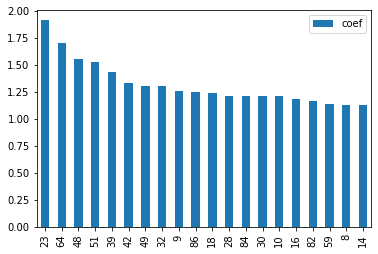

In [137]:
df_features.sort_values(by='coef', ascending=False).head(20).plot(kind='bar')

In [138]:
df_features.sort_values(by='coef', ascending=False).head(40)

# loan amnt is a numeric - so 1 standard deviation increase in loan_amnt increases the odds of being current by 32% 

# SD (dummified) - being from SD increses the chance of being current by 76%

,coef,features
23,1.917222,addr_state_ME
64,1.704548,id
48,1.556734,addr_state_VT
51,1.531448,addr_state_WV
39,1.439239,addr_state_OR
42,1.332496,addr_state_SC
49,1.309793,addr_state_WA
32,1.305098,addr_state_NH
9,1.261302,addr_state_CT
86,1.250331,total_rec_prncp


In [139]:
coef

[1.025065066624819,
 0.9381157660265738,
 0.8971264368908418,
 0.9427234782927746,
 0.7971978870998611,
 0.7723594051869334,
 0.9409543594468083,
 0.9181734152662127,
 1.1337339013076018,
 1.261302348960427,
 1.2118287105167989,
 1.0271067936129392,
 0.861381666316477,
 1.0790747830699299,
 1.127336792145364,
 0.9868849116333464,
 1.1842621862928242,
 0.9145369298412163,
 1.2369174512893977,
 0.8745388089673053,
 0.848090024759266,
 0.9242752071118073,
 0.8468883760520476,
 1.9172222987079173,
 0.9351777690568462,
 0.9292752663642411,
 0.8792373765083602,
 0.73924223490592,
 1.2155352795083851,
 0.8974132237141432,
 1.213387938037833,
 0.8766815683372967,
 1.3050979490897254,
 0.9445368345541214,
 0.9052832554373227,
 0.8227325583438927,
 0.8630168300121926,
 1.0436472239024854,
 0.7981745904303156,
 1.4392392514001549,
 0.918782204270664,
 1.0991640280267447,
 1.3324955026730867,
 1.0270844631990155,
 0.9826221640882811,
 0.8847465969889469,
 1.0844917528270643,
 0.9913320534440406,
 

In [140]:
columns

['term_ 60 months',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_other',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY',
 'grade_B',
 'grade_

In [141]:
# Coef and variables
for x,y  in zip(np.exp(logreg.coef_)[0], X_train.columns.values):
    print(x,y)

1.025065066624819 term_ 60 months
0.9381157660265738 purpose_debt_consolidation
0.8971264368908418 purpose_home_improvement
0.9427234782927746 purpose_other
0.7971978870998611 addr_state_AL
0.7723594051869334 addr_state_AR
0.9409543594468083 addr_state_AZ
0.9181734152662127 addr_state_CA
1.1337339013076018 addr_state_CO
1.261302348960427 addr_state_CT
1.2118287105167989 addr_state_DC
1.0271067936129392 addr_state_DE
0.861381666316477 addr_state_FL
1.0790747830699299 addr_state_GA
1.127336792145364 addr_state_HI
0.9868849116333464 addr_state_ID
1.1842621862928242 addr_state_IL
0.9145369298412163 addr_state_IN
1.2369174512893977 addr_state_KS
0.8745388089673053 addr_state_KY
0.848090024759266 addr_state_LA
0.9242752071118073 addr_state_MA
0.8468883760520476 addr_state_MD
1.9172222987079173 addr_state_ME
0.9351777690568462 addr_state_MI
0.9292752663642411 addr_state_MN
0.8792373765083602 addr_state_MO
0.73924223490592 addr_state_MS
1.2155352795083851 addr_state_MT
0.8974132237141432 addr_

In [142]:
X_train.columns.values

array(['term_ 60 months', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_other', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_ID', 'addr_state_IL',
       'addr_state_IN', 'addr_state_KS', 'addr_state_KY', 'addr_state_LA',
       'addr_state_MA', 'addr_state_MD', 'addr_state_ME', 'addr_state_MI',
       'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_MT',
       'addr_state_NC', 'addr_state_ND', 'addr_state_NE', 'addr_state_NH',
       'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY',
       'addr_state_OH', 'addr_state_OK', 'addr_state_OR', 'addr_state_PA',
       'addr_state_RI', 'addr_state_SC', 'addr_state_SD', 'addr_state_TN',
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_sta